# Data Compression and Source Coding

In this chapter, we learned the coding of memoryless source.
Of the various coding theme, I implemented Huffman Coding on python.

The basic lemma for optimal codes is that  
* Optimal code assign shorter words to more probable letters.
* All leaves in the tree of an optimal D-ary prefix-free code have a sibling.
* There is an optimal D-ary prefix-free code whose two least-likely codewords differ only in their last digit.

Based on above lemmas, Huffman codes is designed. (Here, we are dealing with binary Huffman codes)
Among the various letters, we keep on merging the two 'least' likely letters until we merge every letters.
The process of merging can be thought as assigning codewords to the letter.

In [2]:
from ete3 import Tree, TreeStyle

class Binary_Leaf:
    def __init__(self, name, prob_value, l_child = None, r_child = None, parent_node = None, is_root = False, code = ""):
        self.name = name
        self.probability =  prob_value
        self.left_child = l_child
        self.right_child = r_child
        self.parent = parent_node
        self.is_tree = is_root
        self.code = code
    def get_leftchild(self):
        return self.left_child
    def get_rightchild(self):
        return self.right_child
    def get_parent(self):
        return self.parent_node
    def branch_info(self):
        return self.is_tree
    def get_code(self):
        return self.code
    def set_code(self, codeword):
        self.code = codeword
    def set_childcode(self):
        self.left_child.code = self.code + "0"
        self.right_child.code = self.code + "1"
        if self.left_child.is_tree :
            self.left_child.set_childcode()
        if self.right_child.is_tree :
            self.right_child.set_childcode()
    def set_leftchild(self, node):
        self.left_child = node
    def set_rightchild(self, node):
        self.right_child = node

class Leaf_List:
    def __init__(self, leaf_list):
        self.leaves = leaf_list
    def sort_leaf(self):
        return sorted(self.leaves, key=lambda leaf : leaf.probability, reverse = True)
    def compress_leaf(self):
        sorted_leaf = self.sort_leaf()
        least_prob = sorted_leaf[-1]
        next_prob = sorted_leaf[-2]
        merged_leaf = Binary_Leaf("branch", least_prob.probability + next_prob.probability, 
                                  l_child = least_prob, r_child = next_prob, is_root = True)
        self.leaves = sorted_leaf[:-2] + [merged_leaf]
    def show_codes(self):
        for leaf in self.leaves :
            print str(leaf.probability) + " : " + leaf.get_code()            
    def size(self):
        return len(self.leaves)
            
def Tree_search(root):        
    s = ""
    if root.is_tree == False :
        s += root.name
    else :
        s += "("
        s += Tree_search(root.left_child)
        s += ","
        s += Tree_search(root.right_child)
        s += ")"
    return s
            
def Huffman(leaves):
    while(leaves.size() > 1):
        leaves.compress_leaf()
    root = leaves.leaves[0]
    root.set_childcode()
    s = Tree_search(root) + ";"
    t = Tree(s, format=1)
    length = Calculate_length(root)
    return t, length
    
def Calculate_length(root):
    average_length = 0
    if root.is_tree == False:
        average_length += len(root.get_code()) * root.probability
    else :
        average_length += Calculate_length(root.left_child)
        average_length += Calculate_length(root.right_child)
    return average_length
        
a1 = Binary_Leaf("a1", 0.4)
a2 = Binary_Leaf("a2", 0.3)
a3 = Binary_Leaf("a3", 0.2)
a4 = Binary_Leaf("a4", 0.1)

List = [a1, a2, a3, a4]
Leaves = Leaf_List(List)

tree, length = Huffman(Leaves)
ts = TreeStyle()
ts.show_scale = False
ts.min_leaf_separation = 30
tree.render('Basic_Huffman.png', tree_style = ts)

print "Average Length of this tree is " + str(length)
#ts = TreeStyle()
#ts.min_leaf_separation = 10
#tree.render('Basic Huffman.png')


Average Length of this tree is 1.9


<center><img src="https://github.com/leetae0130/TUM_NeuroEngineering/blob/master/2016WS/InformationTheory/Basic_Huffman.png?raw=true" width=400px></center>

In [3]:
List2 = []

for l1 in List:
    for l2 in List:
        a = Binary_Leaf(l1.name+l2.name, l1.probability*l2.probability)
        List2.append(a)

Leaves = Leaf_List(List2)

tree, length2 = Huffman(Leaves)
ts = TreeStyle()
ts.show_scale = False
ts.min_leaf_separation = 30
tree.render('Basic_Huffman.png', tree_style = ts)

print "Average Length of this tree is " + str(length2)

Average Length of this tree is 3.73


<img src="https://github.com/leetae0130/TUM_NeuroEngineering/blob/master/2016WS/InformationTheory/Huffman2.png?raw=true",width=400,height=300>

In [4]:
def cartesian_leaf(List1, List2):
    List3 = []

    for l1 in List1:
        for l2 in List2:
            a = Binary_Leaf(l1.name+l2.name, l1.probability*l2.probability)
            List3.append(a)    
    return List3

list3 = cartesian_leaf(List, cartesian_leaf(List, List))

Leaves = Leaf_List(list3)

tree, length3 = Huffman(Leaves)
ts = TreeStyle()
ts.show_scale = False
ts.min_leaf_separation = 30
tree.render('Huffman3.png', tree_style = ts)

print "Average Length of this tree is " + str(length3)

Average Length of this tree is 5.577


<img src="https://github.com/leetae0130/TUM_NeuroEngineering/blob/master/2016WS/InformationTheory/Huffman3.png?raw=true",width=400,height=300>

# Compression Rate

During the lecture, we were taught that entropy indicates the level of compression we can achieve.  
And we also learned that as the block size of the source becomes larger and larger, we can approach those rate.  
(Here, we are talking about appropriate level of bits per symbol!)

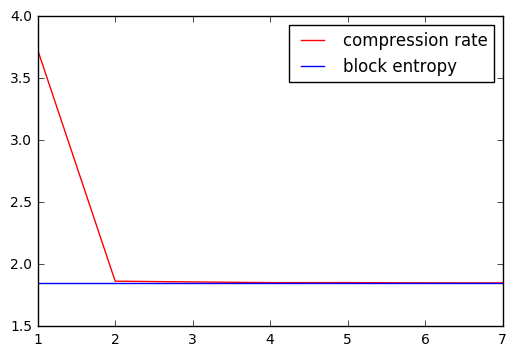

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

p_logp = lambda p : p*math.log(1/p, 2) if p > 0 and p < 1 else 0
entropy = lambda A : sum([p_logp(a) for a in A])

def ncartesian_leaf(List1, n):
    if n > 2:
        return cartesian_leaf(List1, ncartesian_leaf(List1, n-1))
    else:
        return cartesian_leaf(List1, List1)

size = 7
    
x_space = np.linspace(1, size, size)
length_array = np.zeros(size)

entropy1 = entropy([0.1, 0.2, 0.3, 0.4])
entropy_list = [entropy1 for i in range(size)]
    
for i in range(size):
    Leaves = Leaf_List(ncartesian_leaf(List, i+1))

    tree, length = Huffman(Leaves)
    length_array[i] = length/(i+1)

plt.subplot(111)
plt.plot(x_space, length_array, 'r', label = 'compression rate')
plt.plot(x_space, entropy_list, 'b', label = 'block entropy')
plt.legend()
plt.show()

# Conclusion

We applied Huffman code to the [a1 a2 a3 a4] data.  
If we convert those letters to 'G', 'T', 'A' and 'C', we can regard this process of compressing DNA data.
However, as we need to figure out the distribution of base sequences, it requires a lot of effort to construct adequate mapping. Furthermore, if each sequences are equally distributed, the entropy will be close to 2 and there is no meaning to construct huffman code for that.